In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('Plant_1_Generation_Data.csv')
df.head()


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [3]:
# Drop missing values
df = df.dropna()

# Convert date-time to pandas datetime object
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])

# Feature engineering
df['Hour'] = df['DATE_TIME'].dt.hour
df['Day'] = df['DATE_TIME'].dt.day
df['Month'] = df['DATE_TIME'].dt.month

df[['DATE_TIME', 'Hour', 'Day', 'Month', 'DC_POWER']].head()

C:\Users\bhumi\AppData\Local\Temp\ipykernel_10300\929860829.py:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])


,DATE_TIME,Hour,Day,Month,DC_POWER
0,2020-05-15,0,15,5,0.0
1,2020-05-15,0,15,5,0.0
2,2020-05-15,0,15,5,0.0
3,2020-05-15,0,15,5,0.0
4,2020-05-15,0,15,5,0.0


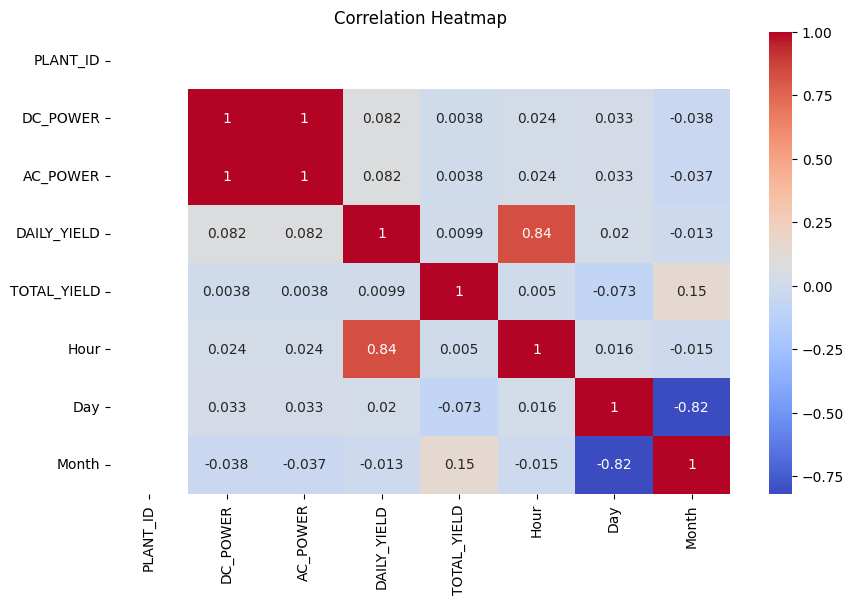

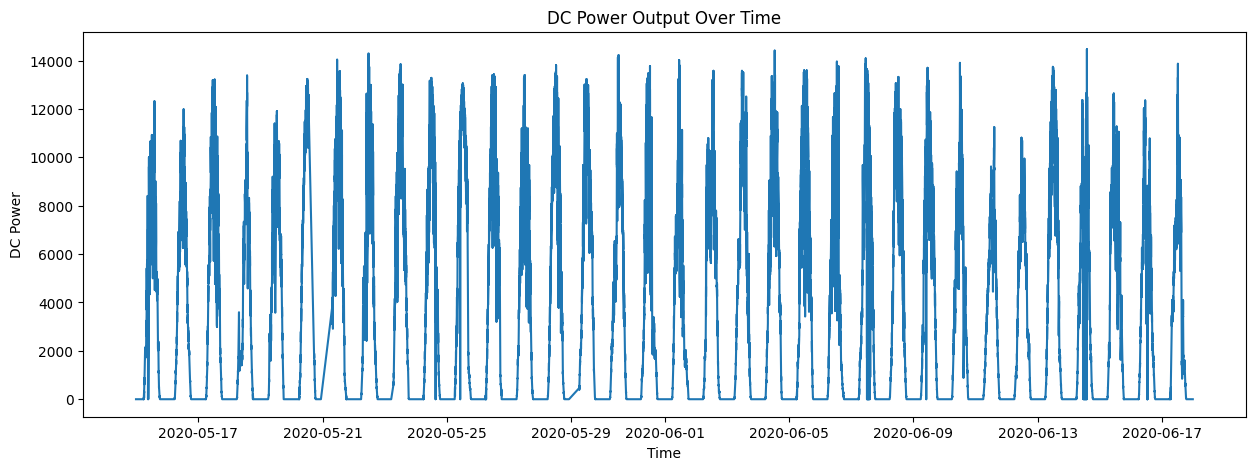

In [5]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# DC power over time
plt.figure(figsize=(15,5))
plt.plot(df['DATE_TIME'], df['DC_POWER'])
plt.title("DC Power Output Over Time")
plt.xlabel("Time")
plt.ylabel("DC Power")
plt.show()



In [6]:
# Features and target
X = df[['Hour', 'Day', 'Month']]
y = df['DC_POWER']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 498.86
RMSE: 961.60


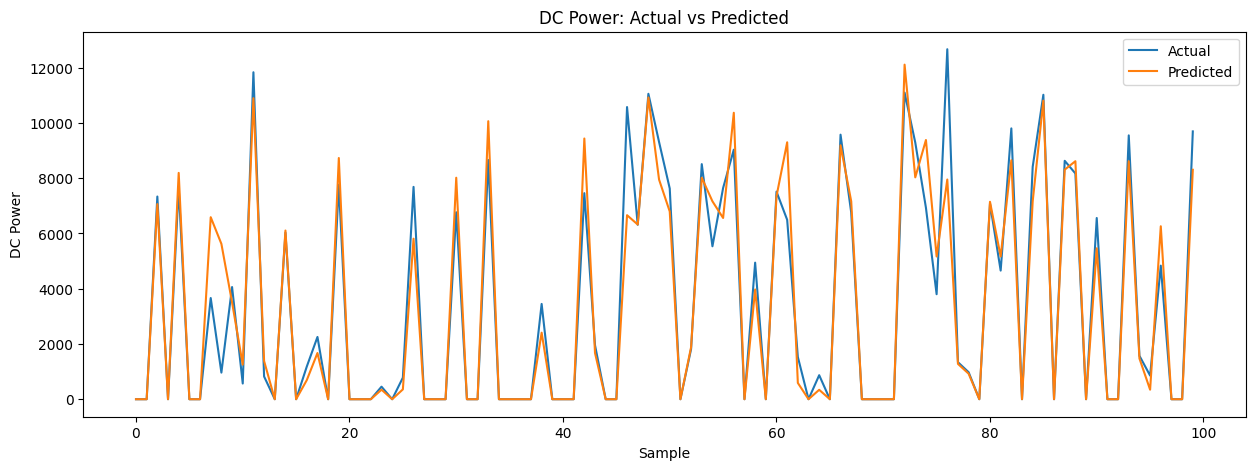

In [9]:
plt.figure(figsize=(15,5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title("DC Power: Actual vs Predicted")
plt.xlabel("Sample")
plt.ylabel("DC Power")
plt.legend()
plt.show()


In [11]:
import warnings
warnings.filterwarnings("ignore")


In [15]:
import os
os.getcwd()


'd:\\Solar_Forecasting_Project'

In [16]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Load and preprocess the data
@st.cache_data
def load_data():
    df = pd.read_csv("Plant_1_Generation_Data.csv")
    df = df.dropna()
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
    df['Hour'] = df['DATE_TIME'].dt.hour
    df['Day'] = df['DATE_TIME'].dt.day
    df['Month'] = df['DATE_TIME'].dt.month
    return df

# Train the model
@st.cache_resource
def train_model(df):
    X = df[['Hour', 'Day', 'Month']]
    y = df['DC_POWER']
    model = RandomForestRegressor()
    model.fit(X, y)
    return model

# Load data and train model
df = load_data()
model = train_model(df)

# Streamlit UI
st.title("🔆 Solar Power Forecasting App")

st.markdown("Enter the time details below to predict the expected **DC power output** of a solar plant:")

hour = st.slider("Select Hour", 0, 23, 12)
day = st.slider("Select Day of Month", 1, 31, 15)
month = st.slider("Select Month", 1, 12, 6)

if st.button("Predict DC Power"):
    input_data = pd.DataFrame([[hour, day, month]], columns=['Hour', 'Day', 'Month'])
    prediction = model.predict(input_data)[0]
    st.success(f"🌞 Predicted DC Power Output: **{prediction:.2f}** kW")

# Optional: Show sample data and chart
with st.expander("🔍 View Sample Data & Chart"):
    st.write(df.head())
    st.line_chart(df['DC_POWER'].reset_index(drop=True))


Writing app.py


In [ ]:
!streamlit run app.py
